GITHUB LINK:

Import Libraries and Setup

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Setting a seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

Loading  the Data

In [ ]:
## Load full data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Labels for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Training set: {x_train.shape}") # (60000, 28, 28)
print(f"Testing set: {x_test.shape}")   # (10000, 28, 28)

Training set: (60000, 28, 28)
Testing set: (10000, 28, 28)


Data Preprocessing

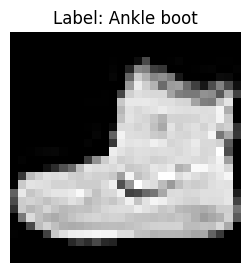

In [ ]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for a CNN (Samples, Height, Width, Channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Visualize one sample
plt.figure(figsize=(3,3))
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.title(f"Label: {class_names[y_train[0]]}")
plt.axis('off')
plt.show()

Neural Network Design

In [ ]:
model = models.Sequential([
    # Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Classification Head
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3), # Prevents overfitting
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

Model Training

In [ ]:
# Train on all 60,000 images
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.1)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7868 - loss: 0.6243 - val_accuracy: 0.8597 - val_loss: 0.3755
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8793 - loss: 0.3328 - val_accuracy: 0.8883 - val_loss: 0.2999
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8948 - loss: 0.2824 - val_accuracy: 0.8972 - val_loss: 0.2781
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9066 - loss: 0.2500 - val_accuracy: 0.8990 - val_loss: 0.2810
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9166 - loss: 0.2243 - val_accuracy: 0.9007 - val_loss: 0.2696
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9242 - loss: 0.2027 - val_accuracy: 0.9042 - val_loss: 0.2832
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9308 - loss: 0.1852 - val_accuracy: 0.8930 - val_loss: 0.3031
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9358 - loss: 0.1673 - val_accuracy: 0

Evaluation and Visualization

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9072 - loss: 0.3643

Final Test Accuracy (Full Dataset): 90.60%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


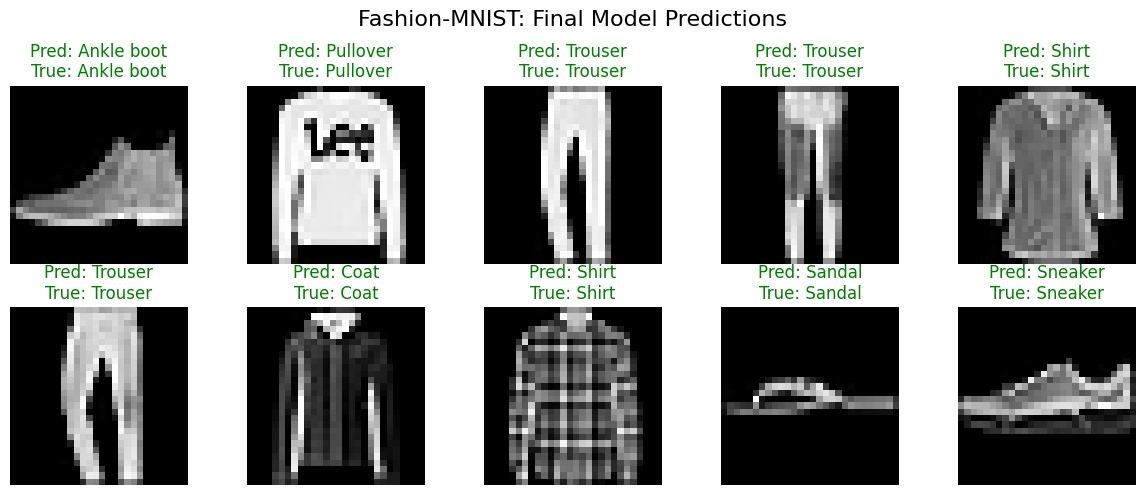

In [ ]:
# Evaluate performance on the full 10,000 image test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"\nFinal Test Accuracy (Full Dataset): {test_acc * 100:.2f}%")

# Generate predictions for the test images
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1) # Get the index of the highest probability

# Plot results to visually verify model performance
plt.figure(figsize=(12, 5))
for i in range(10): # Showing 10 images for a better overview
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    pred_idx = predicted_labels[i]
    true_idx = y_test[i]

    # Use green text for correct predictions and red for incorrect ones
    title_obj = plt.title(f"Pred: {class_names[pred_idx]}\nTrue: {class_names[true_idx]}")
    if pred_idx == true_idx:
        plt.setp(title_obj, color='g')
    else:
        plt.setp(title_obj, color='r')

    plt.axis('off')

plt.suptitle("Fashion-MNIST: Final Model Predictions", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Save the model to a file
model.save('fashion_model_v1.h5')

# Download the file to your computer for the submission
from google.colab import files
files.download('fashion_model_v1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>